Week 12 - Preprocessing Data for scikit-learn Assignment

Name: Anisul Arman

Course_ID: IS 362 Data Acquisition and Management . 

## Description


### Assignment – reprocessing Data for scikit-learn

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.
Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”
Your assignment is to

• First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

• Add meaningful names for each column.

• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.

• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

• Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.
Your deliverable is a Jupyter Notebook that performs these transformation and exploratory data analysis tasks.

In [55]:
# i am isntalling my libaries
!pip install pandas
!pip install requests


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import requests
import zipfile
import requests
import io
import matplotlib.pyplot as plt

In [57]:
# Download and unzip the file
url = "https://archive.ics.uci.edu/static/public/73/mushroom.zip"
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    z.extractall()


In [58]:
data = "agaricus-lepiota.data"

# load data
df = pd.read_csv(data)
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [59]:
# Map the columns name found on the website to the datasets
# Column names from the data dictionary
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Step 3: Read the CSV into pandas
data = pd.read_csv(data, header=None, names=columns)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

From my online research, I found that the gill size of mushrooms can be an indicator of their poisonous nature. Mushrooms have gills located underneath their caps, which are responsible for producing and releasing spores. In some cases, poisonous mushrooms tend to have very tight, crowded, or delicate gills compared to edible varieties.


https://pmc.ncbi.nlm.nih.gov/articles/PMC10785791/

In [61]:
# Subset the data
selected_columns = ['class', 'odor', 'gill-size']
df = data[selected_columns]
df.head()

,class,odor,gill-size
0,p,p,n
1,e,a,b
2,e,l,b
3,p,p,n
4,e,n,b


In [62]:
# Add meaningful names
df.columns = ['edibility', 'odor', 'gill_size']
df.head()


,edibility,odor,gill_size
0,p,p,n
1,e,a,b
2,e,l,b
3,p,p,n
4,e,n,b


In [63]:
import warnings
warnings.filterwarnings("ignore")

# Map categorical codes to numbers e=edible (0), p=poisonous (1)
df['edibility'] = df['edibility'].map({'e': 0, 'p': 1})  

# Map odor
odor_mapping = {char: idx for idx, char in enumerate(df['odor'].unique())}
df['odor'] = df['odor'].map(odor_mapping)

# Map gill_size, 'b' = broad, 'n' = narrow
gill_size_mapping = {'b': 0, 'n': 1}
df['gill_size'] = df['gill_size'].map(gill_size_mapping)

df.head()

,edibility,odor,gill_size
0,1,0,1
1,0,1,0
2,0,2,0
3,1,0,1
4,0,3,0


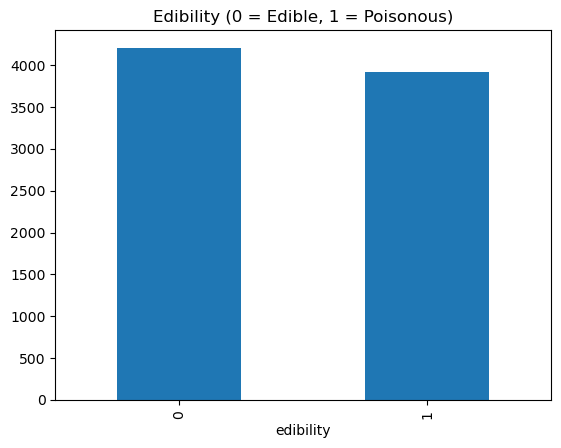

In [64]:
# chart of edibility
df['edibility'].value_counts().plot(kind='bar', title='Edibility (0 = Edible, 1 = Poisonous)')
plt.show()

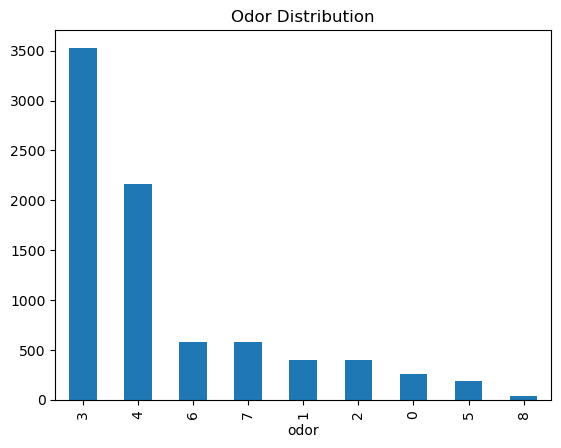

In [65]:
# chart of odor distribution
df['odor'].value_counts().plot(kind='bar', title='Odor Distribution')
plt.show()


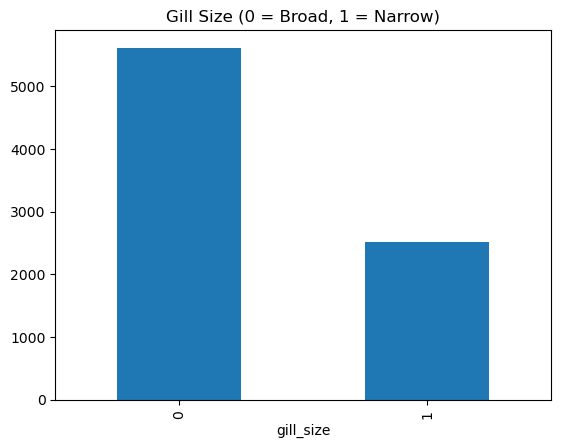

In [66]:
# chart of gill size
df['gill_size'].value_counts().plot(kind='bar', title='Gill Size (0 = Broad, 1 = Narrow)')
plt.show()

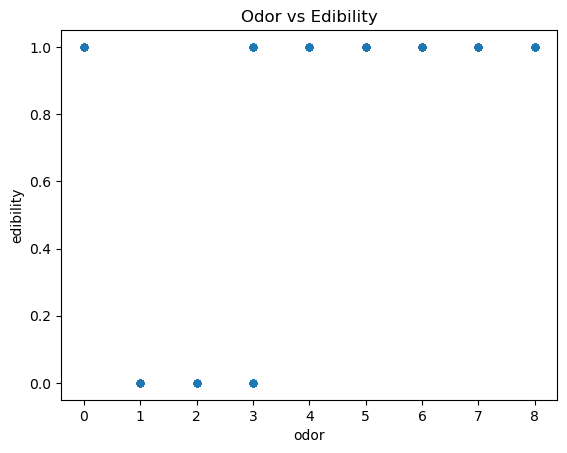

In [67]:
# scatter plot odor vs edibility
df.plot.scatter(x='odor', y='edibility', title='Odor vs Edibility')
plt.show()

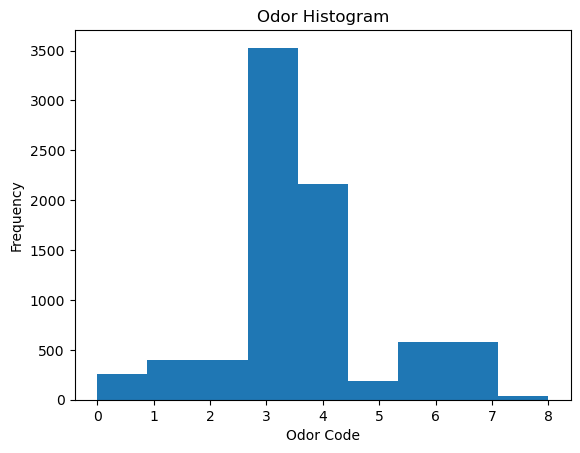

In [68]:
# Histogram of odor
df['odor'].plot(kind='hist', bins=len(df['odor'].unique()), title='Odor Histogram')
plt.xlabel('Odor Code')
plt.show()

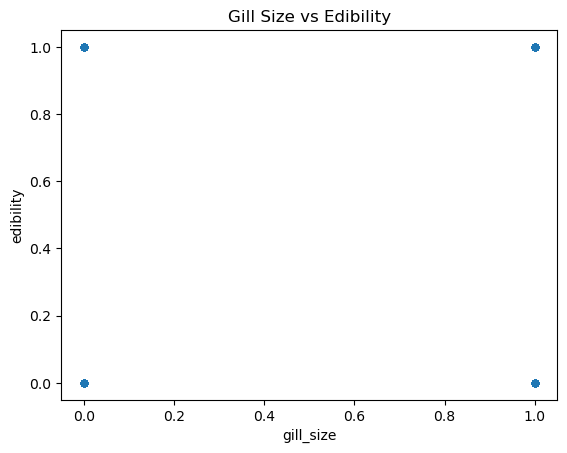

In [69]:
# gill size vs edibility
df.plot.scatter(x='gill_size', y='edibility', title='Gill Size vs Edibility')
plt.show()

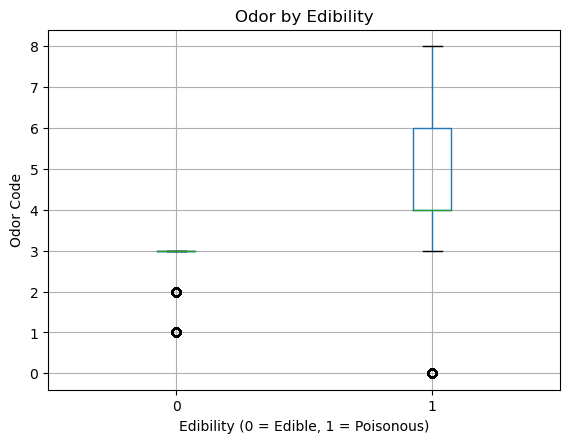

In [70]:
# plot of odor grouped by edibility
df.boxplot(column='odor', by='edibility')
plt.title('Odor by Edibility')
plt.suptitle('')
plt.xlabel('Edibility (0 = Edible, 1 = Poisonous)')
plt.ylabel('Odor Code')
plt.show()

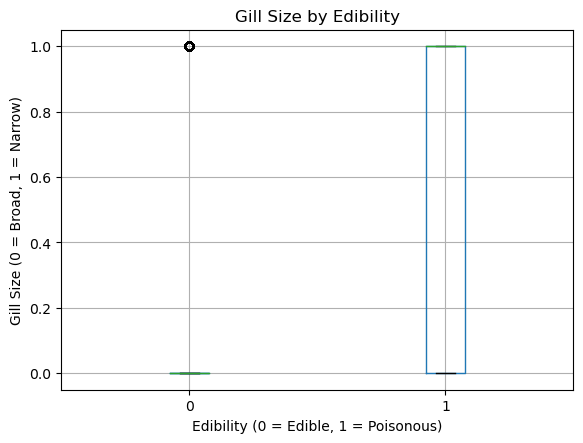

In [71]:
# Box plot of gill size grouped by edibility
df.boxplot(column='gill_size', by='edibility')
plt.title('Gill Size by Edibility')
plt.suptitle('')
plt.xlabel('Edibility (0 = Edible, 1 = Poisonous)')
plt.ylabel('Gill Size (0 = Broad, 1 = Narrow)')
plt.show()